In [1]:
import os
from snudda.simulate.network_pair_pulse_simulation import SnuddaNetworkPairPulseSimulation
n_dSPN = 5
n_iSPN = 5
n_FS = 2
n_LTS = 2
n_ChIN = 2

hold_v = -80e-3    # Holding voltage
max_dist = 100e-6  # Only look at pairs closer than this distance
GABA_rev = -60e-3  # GABA reversal potential

cur_inj = 10e-9

network_path = os.path.join("networks","pair_pulse_simulation")
volume_type="cube"
side_len = 200e-6

In [2]:
pps = SnuddaNetworkPairPulseSimulation(network_path=network_path,
                                       exp_type="Planert2010",
                                       pre_type="FS",
                                       post_type="ALL",
                                       max_dist=max_dist,
                                       hold_voltage=hold_v,
                                       current_injection = cur_inj,
                                       random_seed=123)

Using log file networks/pair_pulse_simulation/log/pair-pulse.log
Checking depolarisation/hyperpolarisation of FS to ALL synapses


In [3]:
pps.setup(n_dSPN=n_dSPN, n_iSPN=n_iSPN,
          n_FS=n_FS, n_LTS=n_LTS, n_ChIN=n_ChIN,
          volume_type=volume_type,
          side_len=side_len)

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn
Adding neurons: ChIN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/chin
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002], [-0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [-0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([0.0009], [-0.0001], [-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [-0.0001], [3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [0.0001], [-3.e-05]) = [1.72360142e-23]
LTS 

In [4]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [5]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 5/64 (16 neurons)
Processing hyper voxel : 21/64 (16 neurons)
Processing hyper voxel : 17/64 (15 neurons)
Processing hyper voxel : 1/64 (14 neurons)
Processing hyper voxel : 22/64 (14 neurons)
Processing hyper voxel : 18/64 (11 neurons)
Processing hyper voxel : 4/64 (10 neurons)
Processing hyper voxel : 6/64 (10 neurons)
Processing hyper voxel : 2/64 (9 neurons)
Processing hyper voxel : 16/64 (8 neurons)
Processing hyper voxel : 20/64 (8 neurons)
Processing hyper voxel : 25/64 (5 neurons)
Processing hyper voxel : 0/64 (3 neurons)
Processing hyper voxel : 9/64 (3 neurons)
Processing hyper voxel : 33/64 (2 neurons)
Processing hyper voxel : 37/64 (2 neurons)
Processing hyper voxel : 24/64 (1 neurons)
Processing hyper voxel : 8/64 (1 neurons)
Processing hyper voxel : 26/64 (1 neurons)


In [6]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()
spr = None

Read 3977 out of total 3977 synapses
Read 12 out of total 12 gapJunctions


Compile neuron modules

In [7]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks
Mod files: "../../snudda/data/neurons/mechanisms/bk_ch.mod" "../../snudda/data/neurons/mechanisms/bk_fs.mod" "../../snudda/data/neurons/mechanisms/bk_ms.mod" "../../snudda/data/neurons/mechanisms/ca_ch.mod" "../../snudda/data/neurons/mechanisms/cadyn_fs.mod" "../../snudda/data/neurons/mechanisms/cadyn_ms.mod" "../../snudda/data/neurons/mechanisms/cal12_ms.mod" "../../snudda/data/neurons/mechanisms/cal13_ms.mod" "../../snudda/data/neurons/mechanisms/cal_ch.mod" "../../snudda/data/neurons/mechanisms/caldyn_ms.mod" "../../snudda/data/neurons/mechanisms/can_fs.mod" "../../snudda/data/neurons/mechanisms/can_ms.mod" "../../snudda/data/neurons/mechanisms/cap_ch.mod" "../../snudda/data/neurons/mechanisms/caq_fs.mod" "../../snudda/data/neurons/mechanisms/caq_ms.mod" "../../snudda/data/neurons/mechanisms/car_fs.mod" "../../snudda/data/neurons/mechanisms/car_ms.mod" "../../snudda/data/neurons/mechanisms/cat32_ms.mod" "../../snudda/data/neurons/mechanisms

To run in parallel instead of the cell below, run this in the ```examples/notebooks``` folder:
```
mpiexec python3 ../../snudda/simulate/network_pair_pulse_simulation.py run Planert2010 networks/pair_pulse_simulation --pre FS
```

In [8]:
pps.run_sim(gaba_rev=GABA_rev)

Loading 16 neurons with 228 synapses and 10 gap junctions


/home/hjorth/.local/lib/python3.9/site-packages/bluepyopt/ephys/simulators.py:88: UserWarning: Unable to find Neuron hoc shared library in /usr/local/lib/python/neuron, not disabling banner
  warnings.warn('Unable to find Neuron hoc shared library in %s, '


Found 20 local gap junctions on node.
Setting GABA reversal potential to -60.0 mV
Current injection to 3 at 0.5 s
Current injection to 7 at 1.0 s
Running simulation for 1.5 s
Running Neuron simulator 1500 ms, with dt=0.025
1% done. Elapsed: 3.1 s, estimated time left: 308.1 s
34% done. Elapsed: 105.5 s, estimated time left: 204.7 s
67% done. Elapsed: 207.5 s, estimated time left: 102.2 s
99% done. Elapsed: 306.6 s, estimated time left: 3.1 s
Neuron simulation finished
Simulation run time: 309.7 s
Writing network output to networks/pair_pulse_simulation/simulation/output.hdf5
CHeck why not able to save...
Using sample dt = None (sample step size None)
Worker 1/1 writing data to networks/pair_pulse_simulation/simulation/output.hdf5


Plot results

Loading 16 neurons with 228 synapses and 10 gap junctions
Loading networks/pair_pulse_simulation/simulation/output.hdf5
Number of pairs excluded, distance > 100.0 mum : 0
Min amp: 0.001054310707788289
Max amp: 0.004457596553274948
Mean amp: 0.002703341505232784 +/- 0.001123796165390503
Amps: [0.00213924 0.0044576  0.00124697 0.00341381 0.00105431 0.00369945
 0.00206003 0.00378375 0.00247493]


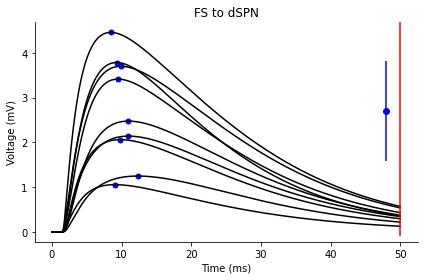

<Figure size 432x288 with 0 Axes>

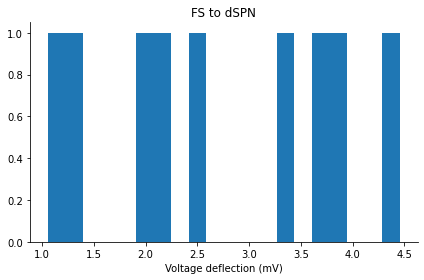

<Figure size 432x288 with 0 Axes>

In [9]:
pps.analyse(post_type="dSPN")

Loading 16 neurons with 228 synapses and 10 gap junctions
Loading networks/pair_pulse_simulation/simulation/output.hdf5
Number of pairs excluded, distance > 100.0 mum : 0
Min amp: 0.002008057440537031
Max amp: 0.00603066371815579
Mean amp: 0.0029639099669424734 +/- 0.0013981062334916543
Amps: [0.00200806 0.00235985 0.00284905 0.00244496 0.00209088 0.00603066]


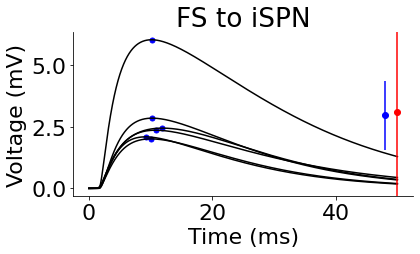

<Figure size 432x288 with 0 Axes>

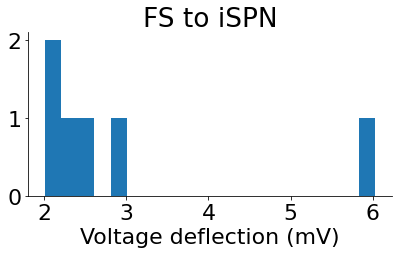

<Figure size 432x288 with 0 Axes>

In [10]:
pps.analyse(post_type="iSPN")